# **BUSINESS CASE 2: SIEMENS ADVANTA SALES FORECASTING**  


## 🎓 Master’s Program in Data Science & Advanced Analytics 
**Nova IMS** | March 2025   
**Course:** Business Cases with Data Science

## 👥 Team **Group Z**  
- **Alice Viegas** | 20240572  
- **Bernardo Faria** | 20240579  
- **Dinis Pinto** | 20240612  

## 📊 Project Overview  
This notebook utilizes the following datasets:  
- **Case2_Sales Data.csv**:  Daily sales data per GCK (product groups) in EUR
- **Case2_Market Data.xlsx**: Important macro-economic indices for Siemens in its most important countries
- **Case2_Test Set Template.xlsx**: Template for the test set submission

The goal of this project is to forecast the sales of some selected product groups of Siemens in Germany.

 ## 1. Initial setup and modules/packages loading

In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [3]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

plots_barTexts_fontSize = 8

## 2. Importing Data

In [7]:
sales_data = pd.read_csv('../Data/Case2_Sales data.csv', sep=';')
market_data = pd.read_excel('../Data/Case2_Market data.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

## 3. Data Understanding/Preparation

In [48]:
df_sales = sales_data.copy()
df_market = market_data.copy()

In [9]:
pd.set_option('display.max_columns', None)  # Displays all columns

### 3.1. Sales Data

In [10]:
df_sales.head()

,DATE,Mapped_GCK,Sales_EUR
0,01.10.2018,#1,0
1,02.10.2018,#1,0
2,03.10.2018,#1,0
3,04.10.2018,#1,0
4,05.10.2018,#1,0


In [11]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9802 entries, 0 to 9801
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        9802 non-null   object
 1   Mapped_GCK  9802 non-null   object
 2   Sales_EUR   9802 non-null   object
dtypes: object(3)
memory usage: 229.9+ KB


In [12]:
df_sales.describe().T

,count,unique,top,freq
DATE,9802,1216,16.04.2021,14
Mapped_GCK,9802,14,#1,1179
Sales_EUR,9802,2609,0,7134


In [13]:
df_sales.duplicated().sum()

0

We can see there are no missing values or duplicates, but the features are not in the correct formats.   
We will need to correct these before proceeding with the analysis.
Additionally, the data is daily, but we need to forecast monthly sales. We will need to aggregate the data accordingly.


In [14]:
df_sales['Sales_EUR']= df_sales['Sales_EUR'].apply(lambda x : x.replace(',', '.')).astype(float)  # Replace comma with dot and convert to float

In [15]:
df_sales['DATE'] = df_sales['DATE'].apply(lambda x : pd.to_datetime(x, format='%d.%m.%Y'))  # Convert to datetime

In [16]:
df_sales['DATE'] = df_sales['DATE'].dt.to_period('M')  # Convert to month

# Aggregating the sales on a monthly basis
df_sales = df_sales.groupby(['DATE', 'Mapped_GCK']).agg({'Sales_EUR': 'sum'}).reset_index()

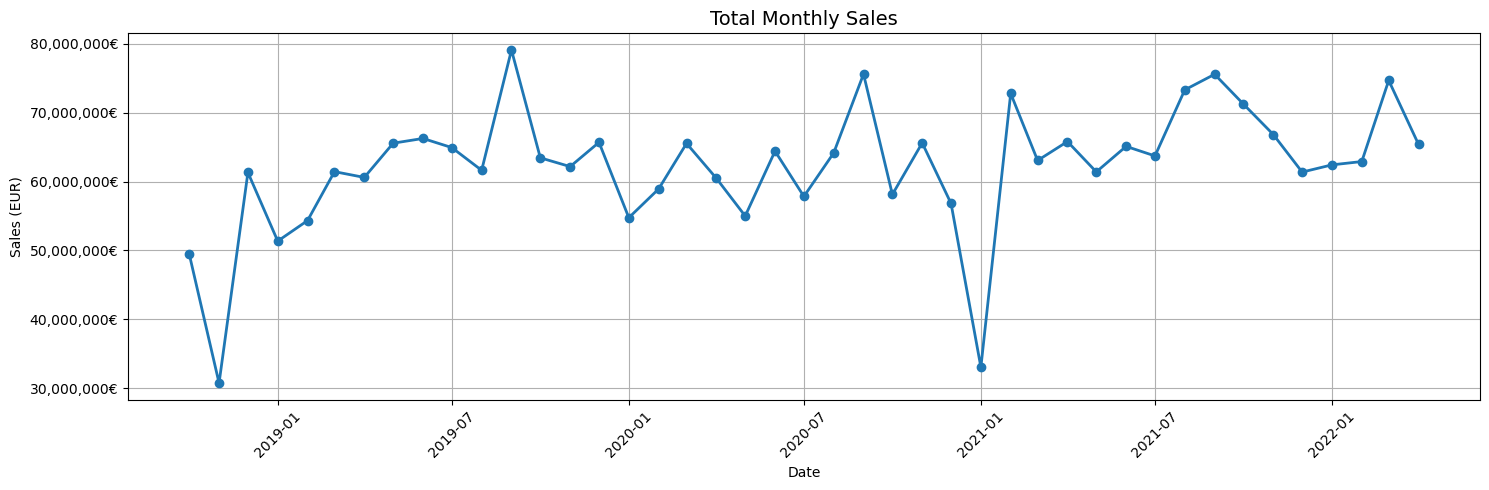

In [17]:
df_sales['DATE'] = df_sales['DATE'].dt.to_timestamp()  # Convert to timestamp for visualizations

plt.figure(figsize=(15, 5))

plt.plot(df_sales.groupby('DATE')['Sales_EUR'].sum(), marker='o', linewidth=2)
plt.title('Total Monthly Sales', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Date', fontsize=subPlots_label_fontSize)
plt.ylabel('Sales (EUR)', fontsize=subPlots_label_fontSize)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}€')) 

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

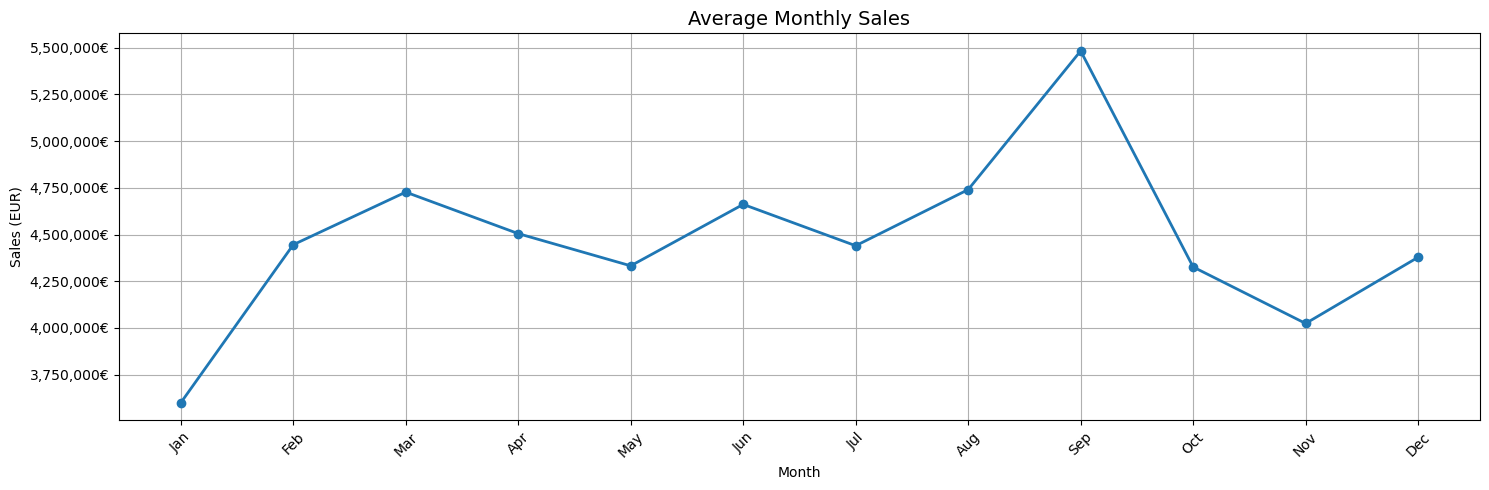

In [18]:
plt.figure(figsize=(15, 5))

plt.plot(df_sales.groupby(df_sales['DATE'].dt.month)['Sales_EUR'].mean(), marker='o', linewidth=2)
plt.title('Average Monthly Sales', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Month', fontsize=subPlots_label_fontSize)
plt.ylabel('Sales (EUR)', fontsize=subPlots_label_fontSize)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}€'))

# Replace x-ticks with month names
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

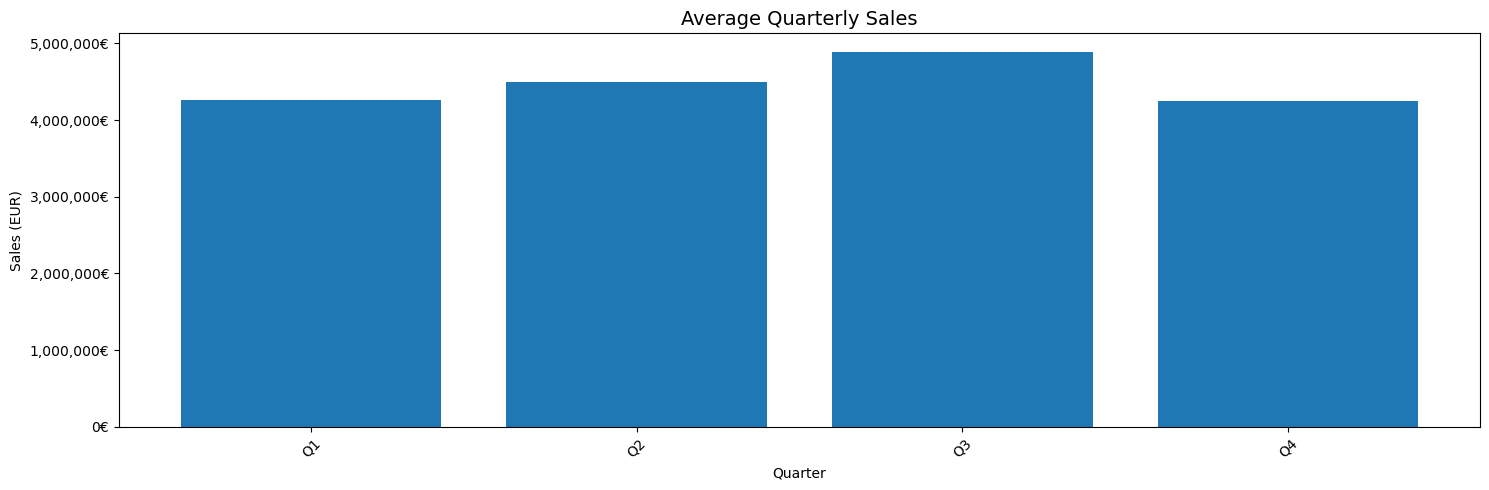

In [19]:
trimester_labels = {
    1: 'Q1', 2: 'Q1', 3: 'Q1', 
    4: 'Q2', 5: 'Q2', 6: 'Q2',
    7: 'Q3', 8: 'Q3', 9: 'Q3',
    10: 'Q4', 11: 'Q4', 12: 'Q4'
}

quarterly_sales = df_sales.groupby(df_sales['DATE'].dt.month.map(trimester_labels))['Sales_EUR'].mean().reset_index()

plt.figure(figsize=(15, 5))

plt.bar(quarterly_sales['DATE'], quarterly_sales['Sales_EUR'])
plt.title('Average Quarterly Sales', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Quarter', fontsize=subPlots_label_fontSize)
plt.ylabel('Sales (EUR)', fontsize=subPlots_label_fontSize)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}€'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


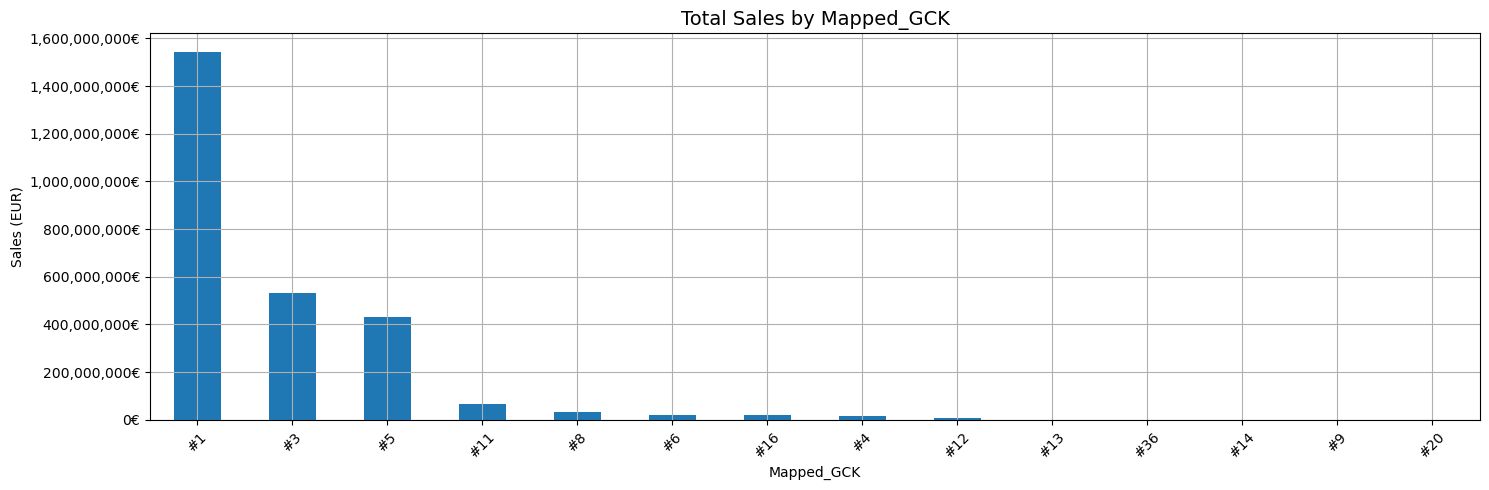

In [20]:
df_sales.groupby('Mapped_GCK')['Sales_EUR'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))

plt.title('Total Sales by Mapped_GCK', fontsize=plots_Title_fontSize, color=plots_Title_textColour)
plt.xlabel('Mapped_GCK', fontsize=subPlots_label_fontSize)
plt.ylabel('Sales (EUR)', fontsize=subPlots_label_fontSize)

# Format y-axis to show values in millions
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}€'))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

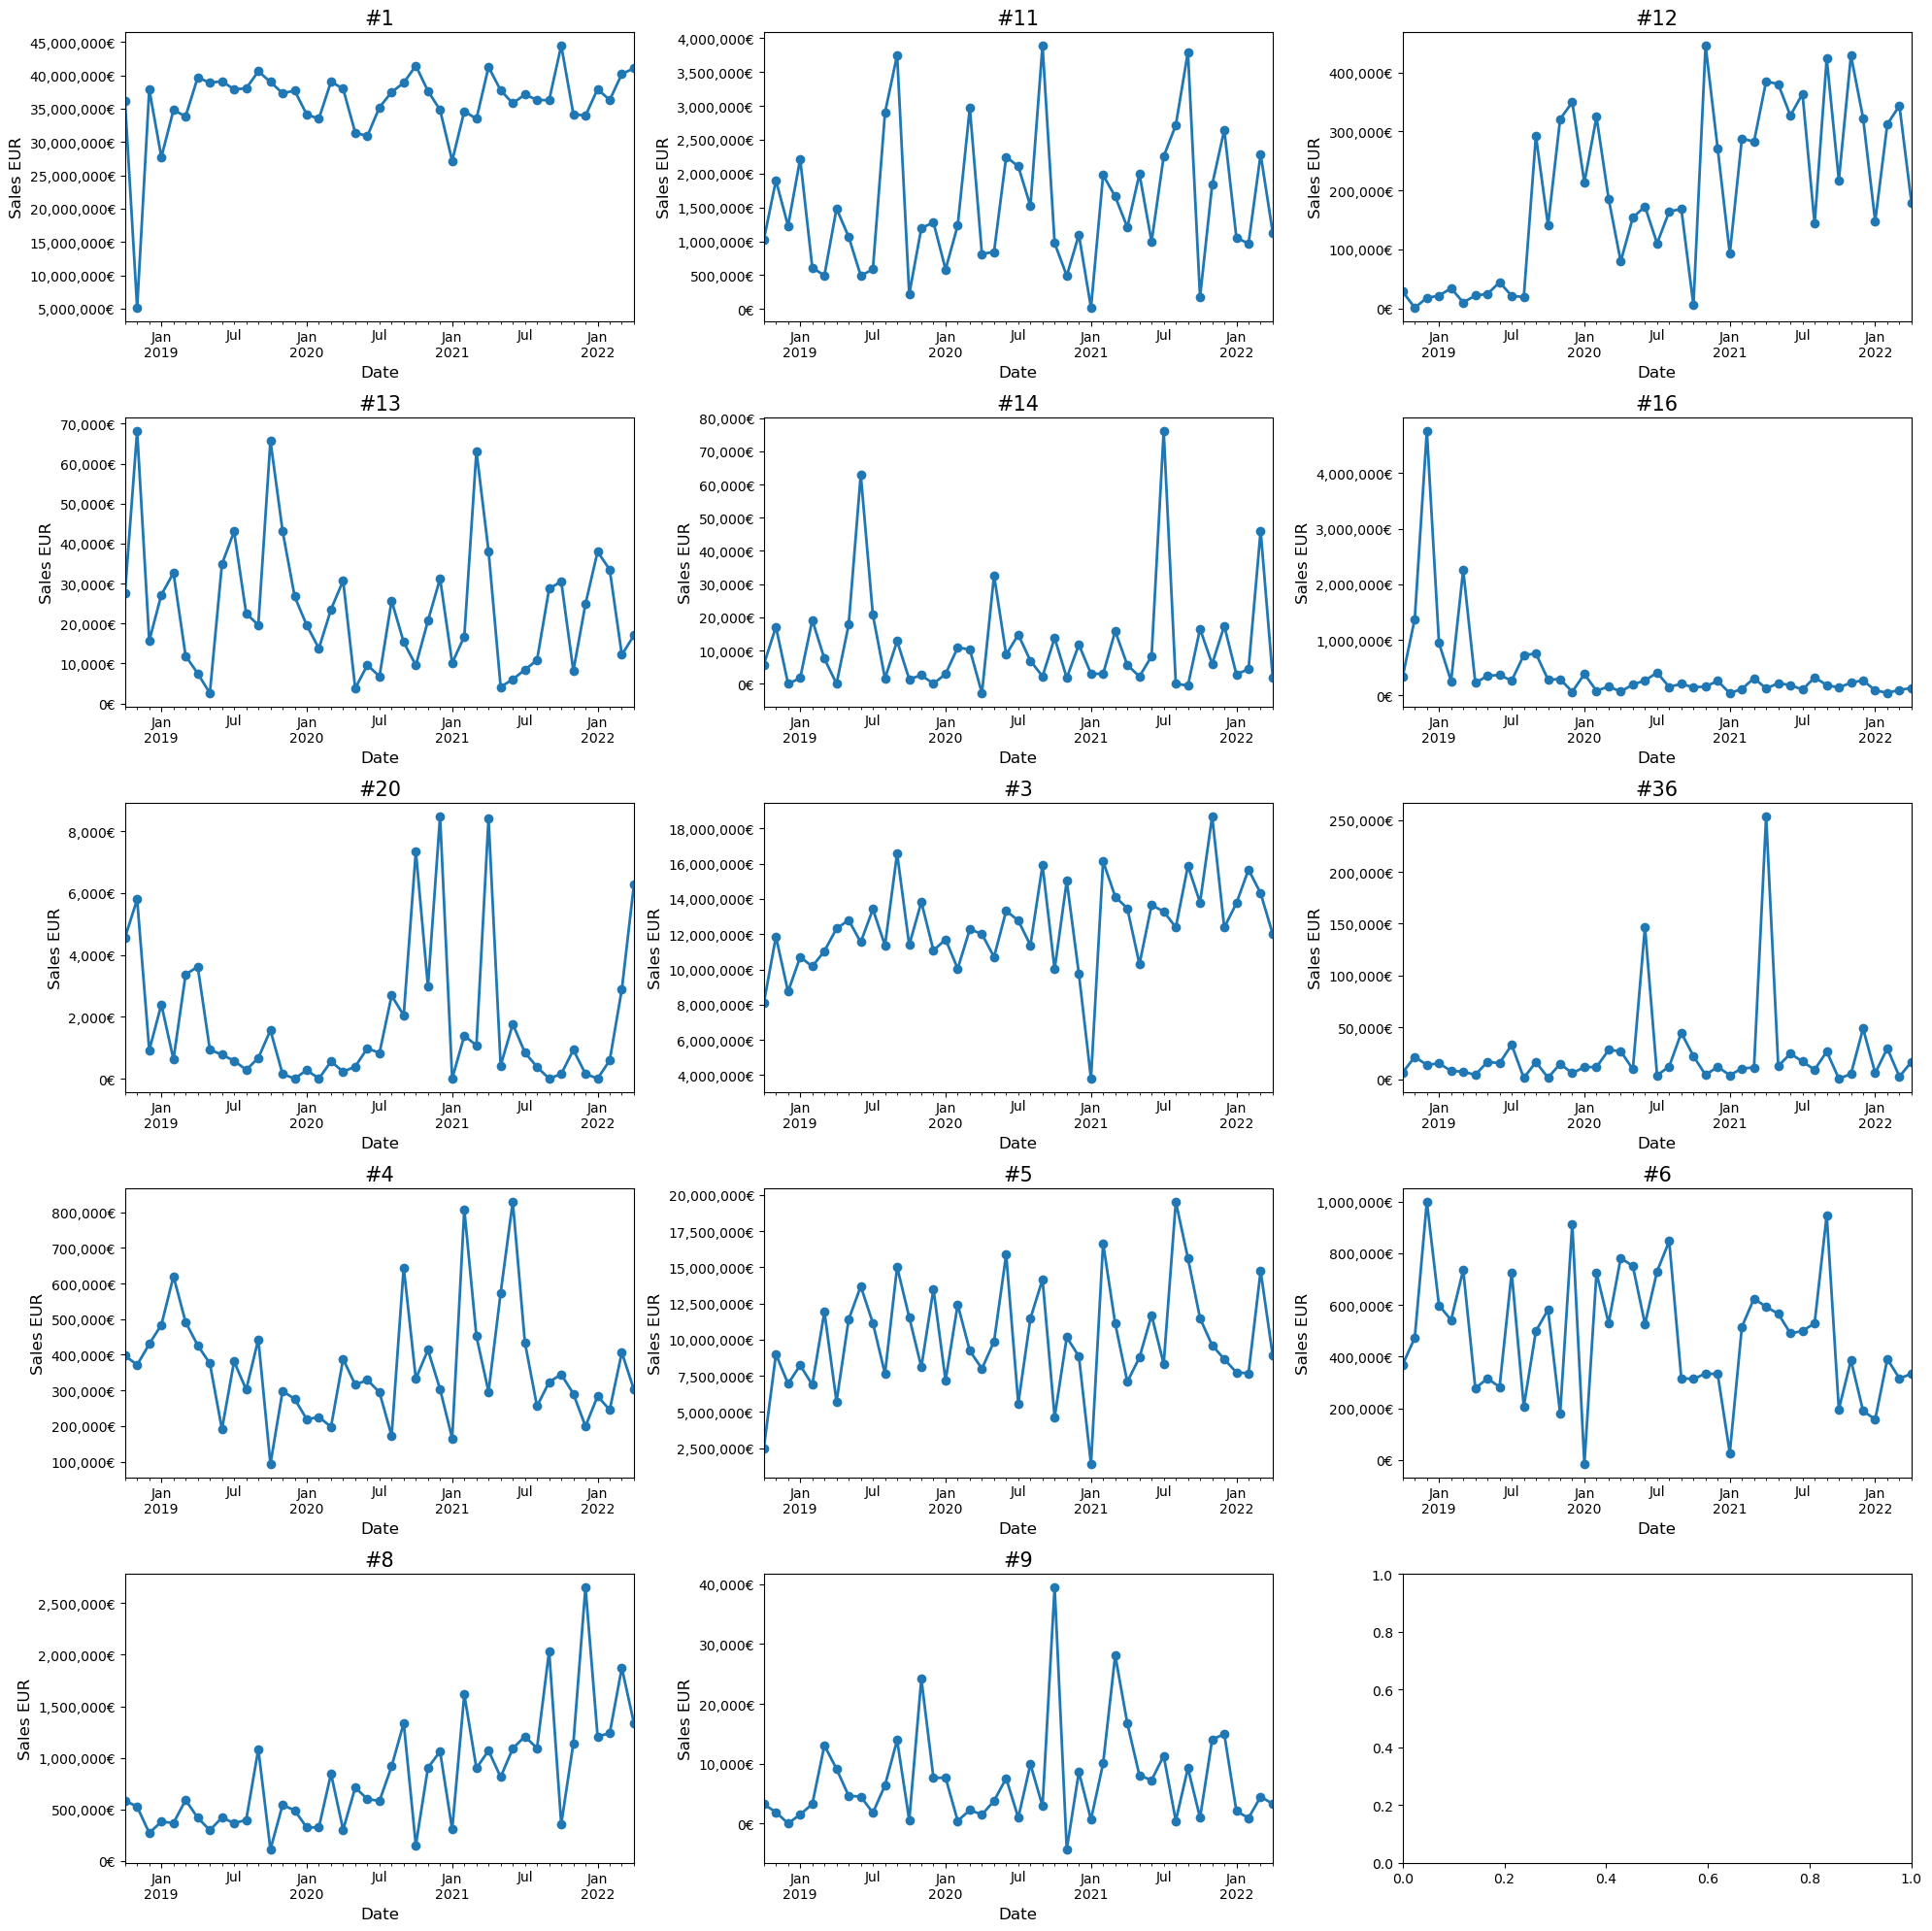

In [21]:
# Create a 5x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(20, 20))

# Flatten the axes array to easily loop through
ax = ax.flatten()

# Loop over the unique values of 'Mapped_GCK' and plot the corresponding data
for i, gck in enumerate(df_sales['Mapped_GCK'].unique()):
    # Filter the data for the current 'Mapped_GCK'
    subset = df_sales[df_sales['Mapped_GCK'] == gck]
    
    # Group by 'DATE' and sum the 'Sales_EUR'
    subset.groupby('DATE')['Sales_EUR'].sum().plot(kind='line', ax=ax[i], marker='o', linewidth=2)
    
    # Set the title and labels for each subplot
    ax[i].set_title(f'{gck}', fontsize=15)  
    ax[i].set_xlabel('Date', fontsize=12) 
    ax[i].set_ylabel('Sales EUR', fontsize=12)

    # Format y-axis to show values in millions
    ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}€'))

# Adjust layout to prevent overlap of labels and titles
plt.tight_layout()

# Display the plot
plt.show()

### 3.2. Market Data

In [49]:
df_market.head()

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,Japan.1,Switzerland,Switzerland.1,United Kingdom,United Kingdom.1,United States,United States.1,Europe,Europe.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Producer Prices,Producer Prices.1,Producer Prices.2,Producer Prices.3,Producer Prices.4,Producer Prices.5,production index,production index.1,production index.2,production index.3,production index.4,production index.5,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,World: Price of Base Metals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,United States: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment,China: Electrical equipment,United States: Machinery and equipment n.e.c.,World: Machinery and equipment n.e.c.,Switzerland: Machinery and equipment n.e.c.,United Kingdom: Machinery and equipment n.e.c.,Italy: Machinery and equipment n.e.c.,Japan: Machinery and equipment n.e.c.,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.62748,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779

In [50]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           221 non-null    object
 1   China                221 non-null    object
 2   China.1              221 non-null    object
 3   France               221 non-null    object
 4   France.1             221 non-null    object
 5   Germany              221 non-null    object
 6   Germany.1            221 non-null    object
 7   Italy                221 non-null    object
 8   Italy.1              221 non-null    object
 9   Japan                221 non-null    object
 10  Japan.1              221 non-null    object
 11  Switzerland          220 non-null    object
 12  Switzerland.1        220 non-null    object
 13  United Kingdom       221 non-null    object
 14  United Kingdom.1     203 non-null    object
 15  United States        221 non-null    object
 16  United S

In [51]:
info_market = df_market.iloc[0:2]
df_market = df_market.iloc[2:]

In [53]:
info_market

,Unnamed: 0,China,China.1,France,France.1,Germany,Germany.1,Italy,Italy.1,Japan,Japan.1,Switzerland,Switzerland.1,United Kingdom,United Kingdom.1,United States,United States.1,Europe,Europe.1,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Producer Prices,Producer Prices.1,Producer Prices.2,Producer Prices.3,Producer Prices.4,Producer Prices.5,production index,production index.1,production index.2,production index.3,production index.4,production index.5,production index.6,production index.7,production index.8,production index.9,production index.10,production index.11,production index.12,production index.13,production index.14,production index.15
0,Index 2010=100 (if not otherwise noted),Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,Production Index Machinery & Electricals,Shipments Index Machinery & Electricals,World: Price of Base Metals,World: Price of Energy,World: Price of Metals & Minerals,World: Price of Natural gas index,"World: Price of Crude oil, average",World: Price of Copper,United States: EUR in LCU,United States: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment,China: Electrical equipment,United States: Machinery and equipment n.e.c.,World: Machinery and equipment n.e.c.,Switzerland: Machinery and equipment n.e.c.,United Kingdom: Machinery and equipment n.e.c.,Italy: Machinery and equipment n.e.c.,Japan: Machinery and equipment n.e.c.,France: Machinery and equipment n.e.c.,Germany: Machinery and equipment n.e.c.,United States: Electrical equipment,World: Electrical equipment,Switzerland: Electrical equipment,United Kingdom: Electrical equipment,Italy: Electrical equipment,Japan: Electrical equipment,France: Electrical equipment,Germany: Electrical equipment
1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org


In [54]:
info_market = info_market.transpose().reset_index()
info_market.columns = info_market.iloc[0]
info_market = info_market[1:]  # Drop the old header row
info_market = info_market.rename(columns={info_market.columns[0]: 'Region', info_market.columns[1]: 'Index Name', info_market.columns[2]: 'Index Code'})
info_market.reset_index(drop=True, inplace=True)

In [55]:
info_market

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
2,France,Production Index Machinery & Electricals,MAB_ELE_PRO250
3,France.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP250
4,Germany,Production Index Machinery & Electricals,MAB_ELE_PRO276
5,Germany.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP276
6,Italy,Production Index Machinery & Electricals,MAB_ELE_PRO380
7,Italy.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP380
8,Japan,Production Index Machinery & Electricals,MAB_ELE_PRO392
9,Japan.1,Shipments Index Machinery & Electricals,MAB_ELE_SHP392


In [56]:
# Lets give a more consistent formating to the info_market dataframe
for idx, row in  info_market.iterrows():
    region = row['Region']
    index_name = row['Index Name']
    
 # Extract Region from Index Name if needed
    if ':' in index_name:
        info_market.at[idx, 'Region'] = index_name.split(':')[0].strip()
        info_market.at[idx, 'Index Name'] = index_name.split(':')[1].strip()
    
    # Remove decimal suffixes from Region
    if '.' in region:
        info_market.at[idx, 'Region'] = row['Region'].split('.')[0].strip()
    
info_market.sort_values('Region').reset_index(drop=True) 

,Region,Index Name,Index Code
0,China,Production Index Machinery & Electricals,MAB_ELE_PRO156
1,China,Shipments Index Machinery & Electricals,MAB_ELE_SHP156
2,China,Electrical equipment,PRI27156_org
3,Europe,Shipments Index Machinery & Electricals,MAB_ELE_SHP1100
4,Europe,Production Index Machinery & Electricals,MAB_ELE_PRO1100
5,France,Production Index Machinery & Electricals,MAB_ELE_PRO250
6,France,Shipments Index Machinery & Electricals,MAB_ELE_SHP250
7,France,Machinery and equipment n.e.c.,PRO28250_org
8,France,Electrical equipment,PRI27250_org
9,France,Electrical equipment,PRO27250_org


In [57]:
info_market.describe()

,Region,Index Name,Index Code
count,47,47,47
unique,10,11,47
top,World,Electrical equipment,MAB_ELE_PRO156
freq,8,14,1


In [63]:
df_market.columns = market_data.iloc[1] 

In [64]:
df_market

1,date,MAB_ELE_PRO156,MAB_ELE_SHP156,MAB_ELE_PRO250,MAB_ELE_SHP250,MAB_ELE_PRO276,MAB_ELE_SHP276,MAB_ELE_PRO380,MAB_ELE_SHP380,MAB_ELE_PRO392,MAB_ELE_SHP392,MAB_ELE_PRO756,MAB_ELE_SHP756,MAB_ELE_PRO826,MAB_ELE_SHP826,MAB_ELE_PRO840,MAB_ELE_SHP840,MAB_ELE_PRO1100,MAB_ELE_SHP1100,RohiBASEMET1000_org,RohiENERGY1000_org,RohiMETMIN1000_org,RohiNATGAS1000_org,RohCRUDE_PETRO1000_org,RohCOPPER1000_org,WKLWEUR840_org,PRI27840_org,PRI27826_org,PRI27380_org,PRI27250_org,PRI27276_org,PRI27156_org,PRO28840_org,PRO281000_org,PRO28756_org,PRO28826_org,PRO28380_org,PRO28392_org,PRO28250_org,PRO28276_org,PRO27840_org,PRO271000_org,PRO27756_org,PRO27826_org,PRO27380_org,PRO27392_org,PRO27250_org,PRO27276_org
2,2004m2,16.940704,16.940704,112.091273,83.458866,82.623037,79.452532,124.289603,86.560493,109.33401,110.495272,91.221862,89.987275,111.353812,73.601265,107.6014,79.24023,97.122911,80.09853,54.039811,44.123338,48.747945,87.076974,39.639458,36.623832,1.2646,78.969864,80.757423,93.020027,NaN,93.230453,NaN,102.491722,97.597374,97.1,106.191977,116.790276,110.890034,118.274109,80.82901,117.723991,NaN,81.1,120.706516,141.510864,106.161262,102.077057,85.9132
3,2004m3,23.711852,23.711852,136.327976,106.168192,100.556582,97.012918,143.411662,106.344544,140.884616,144.686166,85.866287,79.883583,127.558608,84.047595,110.187364,98.619024,113.783904,96.015929,54.666162,47.588957,49.256157,87.192705,42.592034,39.931055,1.2262,79.673569,80.962135,93.540268,NaN,93.335678,NaN,105.62748,113.224892,91.195116,121.625075,139.288391,141.176853,148.121841,102.130104,119.220779,NaN,76.690307,138.30955,152.880234,140.288741,117.225685,97.670815
4,2004m4,24.435235,24.435235,117.791806,92.007646,89.653203,84.932358,129.083828,95.579673,105.853579,102.655769,85.622508,79.740802,108.732297,73.026027,108.166564,89.774031,101.715199,85.167236,54.872715,47.779013,49.423751,91.379923,42.650637,39.134854,1.1985,80.337639,80.757423,93.852425,NaN,93.440903,NaN,103.484955,100.16909,93.793535,104.965505,125.289566,105.648765,125.482231,90.961426,117.441124,NaN,71.552403,115.55733,137.796875,106.271197,105.335777,87.253983
5,2004m5,23.708115,23.708115,109.002541,85.696486,86.880571,82.372794,135.590391,100.087039,101.864777,100.305285,85.378729,79.598021,110.6452,74.591883,108.425887,87.463813,101.275727,84.485767,51.230356,53.590898,46.468392,99.04452,47.517121,36.278433,1.2007,80.798828,80.757423,93.852425,NaN,93.546127,NaN,103.643944,99.581436,96.391954,105.885359,131.988998,101.990361,116.64975,88.082901,117.899216,NaN,66.4145,119.269534,143.860535,101.60871,96.616508,84.675552
6,2004m6,27.009138,27.009138,133.785737,106.641482,99.010814,95.10874,136.424935,110.889719,120.33292,119.61638,85.13495,79.455239,122.02096,82.343346,110.569933,97.364496,112.057197,96.963294,52.876331,50.799575,47.803913,98.636267,44.967605,35.65738,1.2138,80.91349,80.552711,93.956467,NaN,93.440903,NaN,106.062668,109.27771,98.990373,118.252278,132.988922,122.136575,143.248734,100.978699,119.499107,NaN,61.276596,128.849416,144.315308,116.655248,118.45871,95.401802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2021m12,310.763183,310.763183,100.565744,134.589504,118.103281,149.364286,94.006826,150.482735,127.771735,131.029703,106.704029,104.819189,101.273544,NaN,107.040766,148.590371,123.076659,150.046922,125.20703,112.372958,116.715183,236.488368,92.188708,126.76124,1.1304,128.511261,NaN,113.309631,108.18251,115.748863,98.1062,105.736748,134.598755,102.27753,90.350055,103.191399,136.975506,112.791885,129.188248,109.624107,132.281006,114.326241,121.065762,72.915611,109.005151,80.763306,97.773956
217,2022m1,235.956129,235.956129,85.743503,108.15632,94.55061,120.353403,86.851008,101.258277,110.460181,110.823532,103.49926,101.70157,95.003541,NaN,111.052133,129.565798,103.199827,120.338095,133.219393,121.309886,125.229641,196.91114,106.173052,129.829146,1